In [9]:

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras import models
# from keras.layers import Dense
#from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array

## importing libraries

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import time
from sklearn import preprocessing
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import sklearn.metrics
import math
from numpy import mean
from numpy import std

from sklearn.metrics import mean_squared_error, r2_score


print('Done importing libraries')

Done importing libraries


In [10]:
## Functions used throughout code
from sklearn.model_selection import cross_validate

def cross_validate_scores(model_var, X_var, y_var):
    scoring_metrics = ["explained_variance", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error", "neg_median_absolute_error", "r2"] #"neg_mean_squared_log_error"
    scores = cross_validate(model_var, X_var, y_var, scoring=scoring_metrics, cv=10)
    
    #calculate adj r^2
    n = len(X_train)
    k = len(X.columns)
    adj_r2_list = []
    for r2 in scores["test_r2"]:
        adj_r2 = 1-(((1-r2)*(n-1))/(n-k-1))
        adj_r2_list.append(adj_r2)   
    scores["adj_r2"] = adj_r2_list
   
    print(scores["test_r2"])
    for key in scores:
        scores[key] = round(mean(scores[key]), 5)
   
    return scores


def resid_plot(model_var, X_train_var, X_test_var):
    #define plot
    fig, ax = plt.subplots()
    plt.style.use("fivethirtyeight")

    #plot reside in train data
    plt.scatter(model_var.predict(X_train_var), model_var.predict(X_train_var) - y_train, color = "blue", s = 5, label = 'Train data')
    
    #plot resid in test data
    plt.scatter(model_var.predict(X_test_var), model_var.predict(X_test_var) - y_test, color = "red", s = 5, label = 'Test data')
    
    #plot zero error line for easier visibility
    plt.hlines(y = 0, xmin = 0, xmax = ax.get_xbound()[1], linewidth = 1, color = "black")
    
    #plot legend and title
    plt.legend(loc = 'best')
    plt.xlabel(xlabel="Predicted Value (μg/m^3)")
    plt.ylabel(ylabel="Residual (μg/m^3)")
    plt.title("Residual errors")

    #show plot
    plt.show()

In [11]:
df = pd.read_csv("../Data/Bangkok2021.csv")
df = df.dropna()
#scale to ppb
df["O3"] = df["O3"]*1000
df["SO2"] = df["SO2"]*1000
df["NO2"] = df["NO2"]*1000
df["CO"] = df["CO"]*1000
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6629 entries, 0 to 6628
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       6629 non-null   object 
 1   Time       6629 non-null   object 
 2   O3         6629 non-null   float64
 3   PM2.5      6629 non-null   float64
 4   PM10       6629 non-null   float64
 5   CO         6629 non-null   float64
 6   SO2        6629 non-null   float64
 7   NO2        6629 non-null   float64
 8   Temp       6629 non-null   float64
 9   RHum       6629 non-null   float64
 10  WSpd       6629 non-null   float64
 11  O3_P1      6629 non-null   float64
 12  O3_P4      6629 non-null   float64
 13  O3_P8      6629 non-null   float64
 14  O3_P24     6629 non-null   float64
 15  PM2.5_P1   6629 non-null   float64
 16  PM2.5_P4   6629 non-null   float64
 17  PM2.5_P8   6629 non-null   float64
 18  PM2.5_P24  6629 non-null   float64
dtypes: float64(17), object(2)
memory usage: 1.0+ MB


In [12]:
X = df[["O3", "PM2.5", "PM10", "CO", "SO2", "NO2", "Temp", "RHum", "WSpd"]]

y = df['PM2.5_P4']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.1)

print("Training Dataset Size: {} trials".format(X_train.shape[0]))
print("Testing Dataset Size: {} trial".format(X_test.shape[0]))

print('Variables Defined')

Training Dataset Size: 5966 trials
Testing Dataset Size: 663 trial
Variables Defined


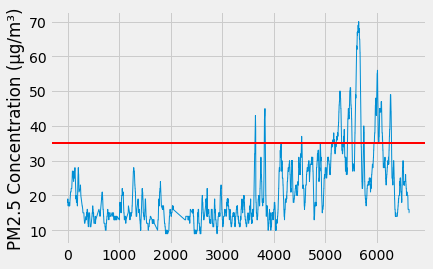

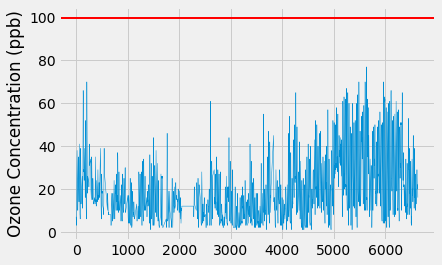

In [13]:
#PLOT PM2.5 AND O3 WITH COMPARISON TO MAXIMUM AMOUNT

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(df["PM2.5"], linewidth = 1)
plt.axhline(35, color = "red", linewidth = 2)
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.show()

plt.plot(df["O3"], linewidth = .5)
plt.axhline(100, color = "red", linewidth = 2)
plt.ylabel("Ozone Concentration (ppb)")
plt.show()

In [14]:
from sklearn import preprocessing
#robust scaler
scaler = preprocessing.RobustScaler()


#minmax
# X_train_ = preprocessing.minmax_scale(X_train, feature_range = (0,1))
# X_test_ =  preprocessing.minmax_scale(X_test, feature_range = (0,1))
# X_ =  preprocessing.minmax_scale(X, feature_range = (0,1))

#StandardScaler
# scaler = preprocessing.StandardScaler()
# X_train_ = scaler.fit_transform(X_train)
# X_test_ = scaler.fit_transform(X_test)
# X_ = scaler.fit_transform(X)

print('Data Scaled')

Data Scaled


Coefficients: 
Intercept: -0.7176367187939974
O3: 0.017835863512837304
PM2.5: 0.8354585854320217
PM10: 0.059643900553148256
CO: 0.0018445551677246331
SO2: 0.16006812572080767
NO2: 0.03600400825286227
Temp: 0.0
RHum: 0.0
WSpd: 0.0
Scores Training
[0.95720795 0.9418114  0.93490086 0.90243015 0.78550788 0.89593442
 0.94930479 0.96262869 0.97304849 0.97346817]
fit_time: 0.00419
score_time: 0.0031
test_explained_variance: 0.92949
test_neg_mean_absolute_error: -0.97646
test_neg_mean_squared_error: -2.19342
test_neg_root_mean_squared_error: -1.37514
test_neg_median_absolute_error: -0.70918
test_r2: 0.92762
adj_r2: 0.92751


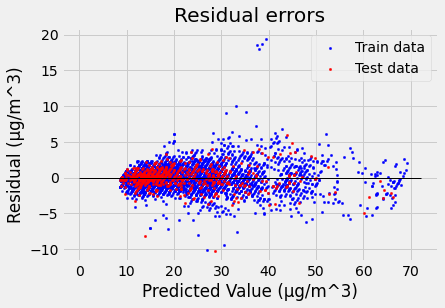

In [15]:
#multiple linear regression
from sklearn.linear_model import LinearRegression


multi_lin_reg = LinearRegression(positive=True)
multi_lin_reg.fit(X_train, y_train)

#Print Coefficients and Weight
print("Coefficients: ")
print("Intercept: " + str(multi_lin_reg.intercept_))
for i in range(len(X.columns)):
    print(X.columns[i] + ": " + str(multi_lin_reg.coef_[i]))

print("Scores Training")
multi_lin_reg_scores = cross_validate_scores(multi_lin_reg, X, y)
for key in multi_lin_reg_scores:
    print(key + ": " + str(multi_lin_reg_scores[key]))

resid_plot(multi_lin_reg, X_train, X_test)


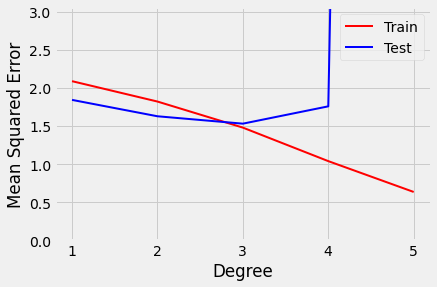

Degrere of Polynomial: 3
Scores Training
[0.95408967 0.94176029 0.93844734 0.90992115 0.7914784  0.89879493
 0.94741033 0.95652282 0.97418189 0.97408343]
fit_time: 0.4571
score_time: 0.00496
test_explained_variance: 0.93019
test_neg_mean_absolute_error: -0.97666
test_neg_mean_squared_error: -2.18785
test_neg_root_mean_squared_error: -1.3759
test_neg_median_absolute_error: -0.70923
test_r2: 0.92867
adj_r2: 0.92856


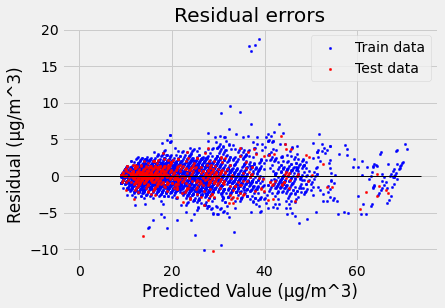

In [16]:
## polynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

def poly_fit(n):
  train_mse = []
  test_mse = []
  for i in range(1,n+1):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly_train = poly_reg.fit_transform(X_train)
    X_poly_test = poly_reg.fit_transform(X_test)

    linreg_poly = LinearRegression()
    linreg_poly.fit(X_poly_train, y_train)
    train_mse.append((mean_squared_error(y_train, linreg_poly.predict(X_poly_train))))
    test_mse.append((mean_squared_error(y_test, linreg_poly.predict(X_poly_test))))
  plt.plot(np.arange(1,n+1,1), train_mse, color="red", linewidth = 2, label = "Train")
  plt.plot(np.arange(1,n+1,1), test_mse, color="blue", linewidth = 2, label = "Test")
  plt.ylim(0, 2*min(test_mse))
  plt.style.use("fivethirtyeight")
  plt.xlabel("Degree")
  plt.ylabel("Mean Squared Error")
  plt.xticks(np.arange(1,n+1,1))
  plt.legend(loc = "best")
  plt.show()
  return test_mse.index(min(test_mse[1:])) + 1 #returns the best degree train

degree = poly_fit(5)
print("Degrere of Polynomial: " + str(degree))
poly_reg = PolynomialFeatures(degree=degree)
X_poly = poly_reg.fit_transform(X)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)


linreg_poly = LinearRegression(positive= True)
linreg_poly.fit(X_train_poly, y_train)

print("Scores Training")
poly_reg_scores = cross_validate_scores(linreg_poly, X_poly, y)
for key in poly_reg_scores:
    print(key + ": " + str(poly_reg_scores[key]))

resid_plot(linreg_poly, X_train_poly, X_test_poly)

Coefficients: 
Intercept: -0.6419842260378879
9
O3: 0.019178818958058803
PM2.5: 0.7916874605438038
PM10: 0.08242834401918149
CO: 0.0016744499272507614
SO2: 0.17384600647212678
NO2: 0.02647859962403495
Temp: 0.0
RHum: 1.1269521148549872e-05
WSpd: 0.0
Scores Training
[0.9597203  0.94166333 0.93399571 0.90488647 0.7855713  0.89262895
 0.9459567  0.96277681 0.9761165  0.97315931]
fit_time: 0.01328
score_time: 0.0034
test_explained_variance: 0.92901
test_neg_mean_absolute_error: -0.95849
test_neg_mean_squared_error: -2.16379
test_neg_root_mean_squared_error: -1.36788
test_neg_median_absolute_error: -0.6837
test_r2: 0.92765
adj_r2: 0.92754


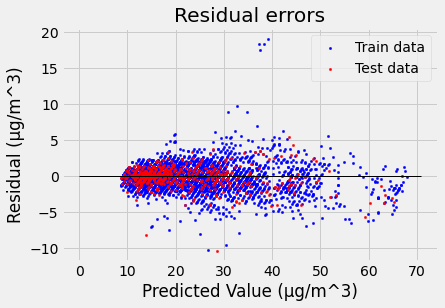

In [17]:
## RANSAC

from sklearn.linear_model import RANSACRegressor, LinearRegression

ransac_reg = RANSACRegressor(LinearRegression(positive=True), random_state = 42)
ransac_reg.fit(X_train, y_train)

#Print Coefficients and Weight
print("Coefficients: ")
print("Intercept: " + str(ransac_reg.estimator_.intercept_))
print(len(ransac_reg.estimator_.coef_))
for i in range(len(X.columns)):
    print(X.columns[i] + ": " + str(ransac_reg.estimator_.coef_[i]))

print("Scores Training")
ransac_reg_scores = cross_validate_scores(ransac_reg, X, y)
for key in ransac_reg_scores:
    print(key + ": " + str(ransac_reg_scores[key]))

resid_plot(ransac_reg, X_train, X_test)



Tree: 
aaa
Scores Training
[0.94499255 0.92693672 0.9161561  0.88203123 0.76400599 0.86971414
 0.91612718 0.86846423 0.8168508  0.95708872]
fit_time: 0.0132
score_time: 0.0031
test_explained_variance: 0.88851
test_neg_mean_absolute_error: -1.33231
test_neg_mean_squared_error: -6.16897
test_neg_root_mean_squared_error: -2.02526
test_neg_median_absolute_error: -0.89815
test_r2: 0.88624
adj_r2: 0.88606


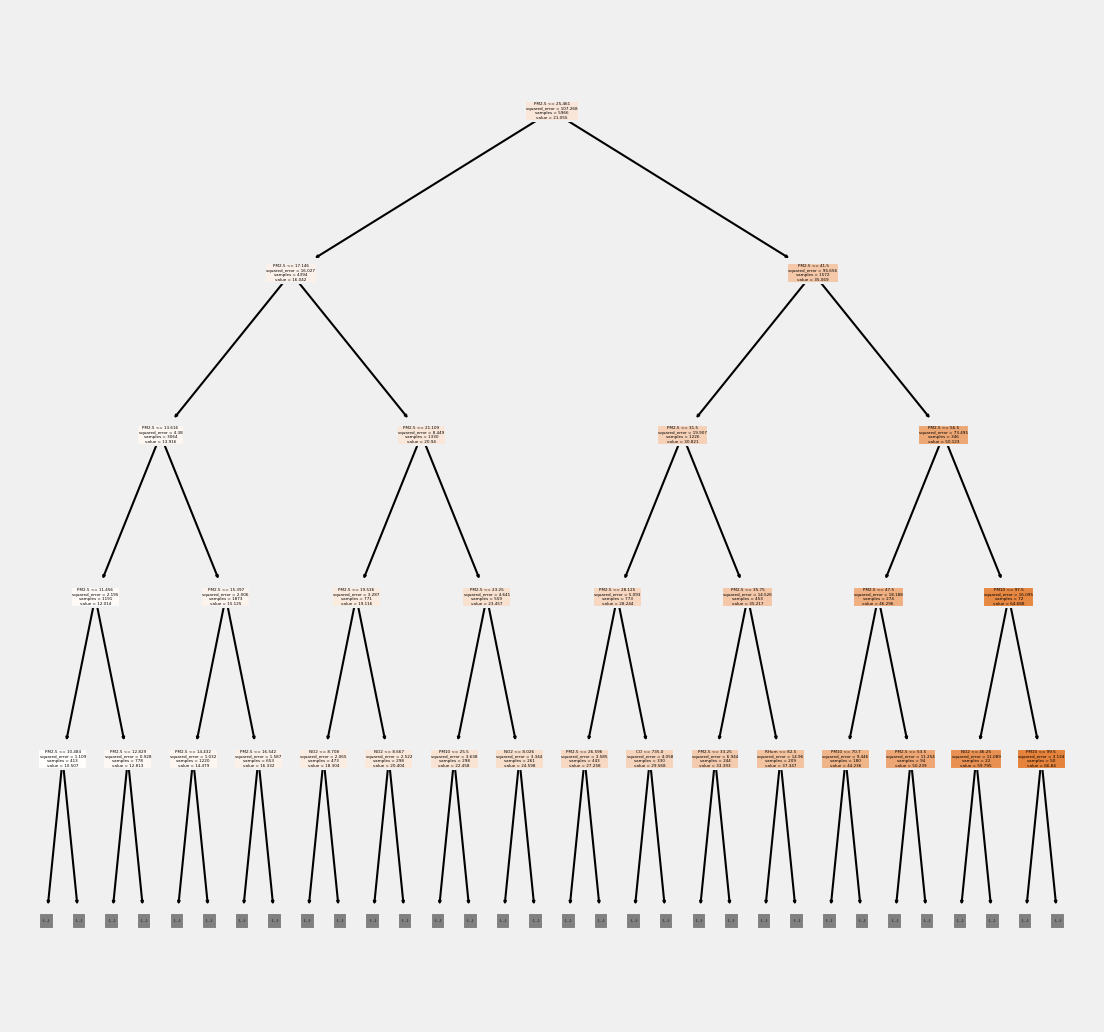

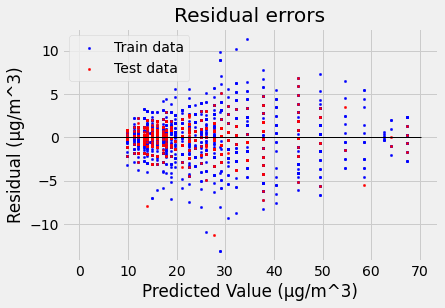

In [18]:
## Decision Tree

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


decision_tree_reg = DecisionTreeRegressor(random_state = 42, max_depth = 5)
decision_tree_reg.fit(X_train, y_train)


#Print Coefficients and Weight
print("Tree: ")

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree_reg, max_depth = 4, feature_names = X.columns, filled = True)

print("aaa")
# dot_data = tree.export_graphviz(decision_tree_reg,out_file=None,feature_names=X.columns)
# graph = graphviz.Source(dot_data)
# graph.render("image",view=True)

# import export_graphviz
# from sklearn.tree import export_graphviz 
  
# # export the decision tree to a tree.dot file
# # for visualizing the plot easily anywhere
# export_graphviz(decision_tree_reg, out_file ='tree.dot',
#                feature_names =X.columns, view=True) 

print("Scores Training")
decision_tree_reg_scores = cross_validate_scores(decision_tree_reg, X, y)
for key in decision_tree_reg_scores:
    print(key + ": " + str(decision_tree_reg_scores[key]))


resid_plot(decision_tree_reg, X_train, X_test)

Scores Training
[0.9517269  0.93192317 0.92893715 0.89601274 0.78832804 0.89355029
 0.93455073 0.91333843 0.85667916 0.97002486]
fit_time: 3.10954
score_time: 0.0321
test_explained_variance: 0.90859
test_neg_mean_absolute_error: -1.18732
test_neg_mean_squared_error: -4.76854
test_neg_root_mean_squared_error: -1.79433
test_neg_median_absolute_error: -0.76733
test_r2: 0.90651
adj_r2: 0.90637


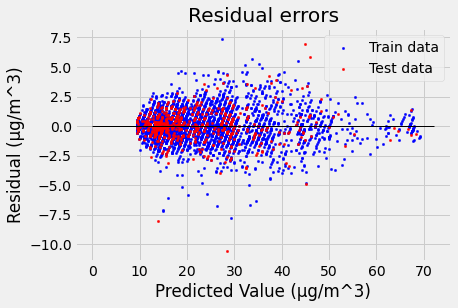

Tree: 


In [19]:
## Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

random_forest_reg = RandomForestRegressor(random_state = 42, max_depth = 7, n_estimators = 300)
random_forest_reg.fit(X_train, y_train)

# random_forest = RandomForestRegressor()
# random_forest.fit(X_train, y_train)
# ### Grid Search ###
# num_leafs = [1,2,4,6,10]

# parameters = [{'n_estimators' : range(100,400,25),
#              'max_depth': range(1,10,2),
#              'min_samples_leaf':num_leafs
#              }]

# random_forest_reg = GridSearchCV(estimator=random_forest, param_grid=parameters,cv = 10)
# random_forest_reg.fit(X_train, y_train)
# print("found best param")
# print(random_forest_reg.best_params_)

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
# sklearn.tree.plot_tree(random_forest_reg, max_depth = 4, feature_names = X.columns, filled = True)


print("Scores Training")
random_forest_reg_scores = cross_validate_scores(random_forest_reg, X, y)
for key in random_forest_reg_scores:
    print(key + ": " + str(random_forest_reg_scores[key]))


resid_plot(random_forest_reg, X_train, X_test)

print("Tree: ")

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
# sklearn.tree.plot_tree(random_forest_reg, max_depth = 4, feature_names = X.columns, filled = True)


Scores Training
[0.68421047 0.5673061  0.67169077 0.60227456 0.39715621 0.86380084
 0.66342383 0.82501614 0.67868071 0.83049238]
fit_time: 0.33181
score_time: 0.0077
test_explained_variance: 0.69887
test_neg_mean_absolute_error: -2.30636
test_neg_mean_squared_error: -13.04561
test_neg_root_mean_squared_error: -3.18046
test_neg_median_absolute_error: -1.69344
test_r2: 0.67841
adj_r2: 0.67792


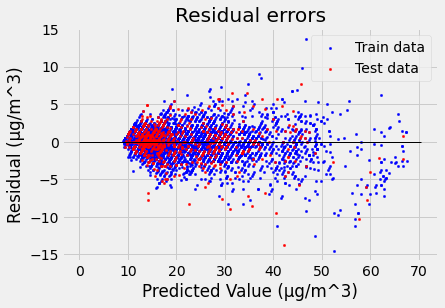

In [20]:
## K Nearest Neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# knn_model = KNeighborsRegressor(n_neighbors=3)
# knn_model.fit(X_train, y_train)

parameters = {"n_neighbors": range(1, 5)}
knn_model = GridSearchCV(KNeighborsRegressor(), parameters)
knn_model.fit(X_train, y_train)

print("Scores Training")
knn_model_scores = cross_validate_scores(knn_model, X, y)
for key in knn_model_scores:
    print(key + ": " + str(knn_model_scores[key]))


resid_plot(knn_model, X_train, X_test)

c:\Users\Jack's PC\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


[16.22829575 16.18929956 18.372588   ... 18.37232505 18.37242963
 16.05719098]
Scores Training
[ 0.00858138 -0.39567089 -1.54972286 -3.93581046 -1.71850145  0.0063383
 -0.92664987 -2.85311432 -2.14068048 -1.32316286]
fit_time: 2.7837
score_time: 0.55907
test_explained_variance: 0.00614
test_neg_mean_absolute_error: -7.81975
test_neg_mean_squared_error: -130.75367
test_neg_root_mean_squared_error: -9.45445
test_neg_median_absolute_error: -6.86293
test_r2: -1.48284
adj_r2: -1.48659


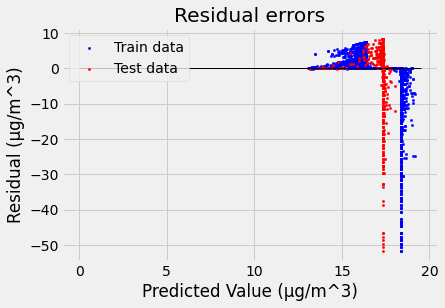

In [21]:
## SVM

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# parameters = {
#     "kernel": ["rbf"],
#     "C": [1,10,10,100,1000],
#     "gamma": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
#     
# }

# svm_reg = GridSearchCV(SVR(), parameters, cv=5, verbose=2)

svm_reg = SVR(kernel='rbf', gamma = 'auto', epsilon = .0001)
svm_reg.fit(X_train, y_train)
print(svm_reg.predict(X_train.values))

print("Scores Training")
svm_reg_scores = cross_validate_scores(svm_reg, X, y)
for key in svm_reg_scores:
    print(key + ": " + str(svm_reg_scores[key]))

resid_plot(svm_reg, X_train, X_test)

In [22]:
print(X_train.values)

[[15.  13.  27.  ... 29.  79.   1.8]
 [19.  12.  23.  ... 35.  55.   5.5]
 [ 2.  21.  41.  ... 26.7 90.   0. ]
 ...
 [28.  37.  65.  ... 23.6 58.   0. ]
 [48.  29.  54.  ... 28.5 55.   0. ]
 [17.  15.  28.  ... 31.2 77.   0. ]]


Scores Training
[0.88695033 0.81463638 0.72508542 0.15950407 0.66034867 0.85642656
 0.91022515 0.89817591 0.85210051 0.93993413]
fit_time: 0.3733
score_time: 0.0095
test_explained_variance: 0.86983
test_neg_mean_absolute_error: -1.7824
test_neg_mean_squared_error: -6.53826
test_neg_root_mean_squared_error: -2.32771
test_neg_median_absolute_error: -1.47209
test_r2: 0.77034
adj_r2: 0.76999


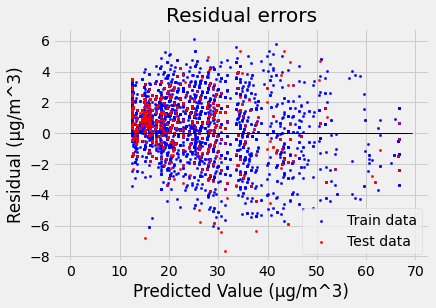

In [23]:
## AdaBoost

from sklearn.ensemble import AdaBoostRegressor


ada_boost_reg = AdaBoostRegressor(n_estimators=50)
ada_boost_reg.fit(X_train, y_train)

print("Scores Training")
ada_boost_reg_scores = cross_validate_scores(ada_boost_reg, X, y)
for key in ada_boost_reg_scores:
    print(key + ": " + str(ada_boost_reg_scores[key]))


resid_plot(ada_boost_reg, X_train, X_test)


Scores Training
[0.93918506 0.92897328 0.91156062 0.88938909 0.78260929 0.89217446
 0.93383453 0.90940822 0.88148059 0.96401521]
fit_time: 0.0787
score_time: 0.009
test_explained_variance: 0.90495
test_neg_mean_absolute_error: -1.21692
test_neg_mean_squared_error: -4.47023
test_neg_root_mean_squared_error: -1.80143
test_neg_median_absolute_error: -0.82557
test_r2: 0.90326
adj_r2: 0.90312


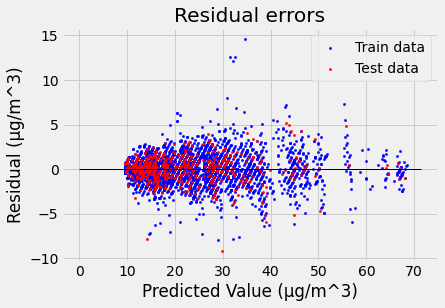

In [24]:
## XGBoost

import xgboost as xg

xgb_reg = xg.XGBRegressor(max_depth=2, n_estimators=40, verbosity = 0, random_state = 42)
xgb_reg.fit(X_train, y_train)

#Print Coefficients and Weight
# print("Coefficients: ")
# print("Intercept: " + str(ransac_reg.estimator_.intercept_))
# print(len(ransac_reg.estimator_.coef_))
# for i in range(len(X.columns)):
#     print(X.columns[i] + ": " + str(ransac_reg.estimator_.coef_[i]))

print("Scores Training")
xgb_reg_scores = cross_validate_scores(xgb_reg, X, y)
for key in xgb_reg_scores:
    print(key + ": " + str(xgb_reg_scores[key]))

resid_plot(xgb_reg, X_train, X_test)

In [35]:
## scores

sum_scores = {"Multiple Linear Regression": multi_lin_reg_scores, "Polynomial Regression": poly_reg_scores, "RANSAC Regression": ransac_reg_scores, "Decision Tree Regression": decision_tree_reg_scores, "Random Forest Regression": random_forest_reg_scores, "KNN Regression": knn_model_scores, "SVM Regression": svm_reg_scores, "ADA Boost Regression": ada_boost_reg_scores, "XGB Regression": xgb_reg_scores}
targets = {"R^2 adjusted": "adj_r2"}

for target in targets:
    print(target)
    for key in sum_scores:
        print(key + ": " + str(sum_scores[key][targets[target]]))
    print()
    

R^2 adjusted
Multiple Linear Regression: 0.92751
Polynomial Regression: 0.92856
RANSAC Regression: 0.92754
Decision Tree Regression: 0.88606
Random Forest Regression: 0.90637
KNN Regression: 0.67792
SVM Regression: -1.48659
ADA Boost Regression: 0.76999
XGB Regression: 0.90312



In [42]:
#choose best model to forecast with

model_dict = {"Multiple Linear Regression": multi_lin_reg, "Polynomial Regression": linreg_poly, "RANSAC Regression": ransac_reg, "Decision Tree Regression": decision_tree_reg, "Random Forest Regression": random_forest_reg, "KNN Regression": knn_model, "SVM Regression": svm_reg, "ADA Boost Regression": ada_boost_reg, "XGB Regression": xgb_reg}
sorter = "adj_r2"

max = 0
#find lowest score of
for key in model_dict:
    if (max < sum_scores[key]["adj_r2"]):
        max = sum_scores[key]["adj_r2"]
        best_model_key = key
best_model = model_dict[best_model_key]
best_model = model_dict["RANSAC Regression"]
print(best_model_key)


Polynomial Regression


In [43]:
### TESTING

yPredln = multi_lin_reg.predict(X_test)
# yPredkn = knRegressor.predict(X_test)
# yPredsvr = svrRegressor.predict(X_test)

predR2ln = str((round((r2_score(y_test,yPredln)), 3)))
# predR2kn = str((round((r2_score(y_test,yPredkn)), 3)))
# predR2svr = str((round((r2_score(y_test,yPredsvr)), 3)))

# print(predR2ln, predR2kn, predR2svr)

The R^2 value for Linear Regression is   : 0.982


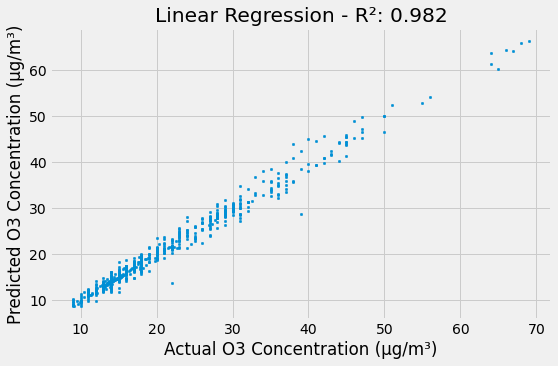

In [44]:
# ln reg


print('The R^2 value for Linear Regression is   :', round((r2_score(y_test,yPredln)), 3))
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)
plt.scatter(y_test, yPredln, s= 6)

plt.xlabel('Actual O3 Concentration (µg/m³)')
plt.ylabel('Predicted O3 Concentration (µg/m³)')
plt.grid(b= True)
plt.title("Linear Regression - R²: %s" %predR2ln)
plt.show()


# print(len(X_test))
# print(len(yPredln))
# print(min(y_test), max(y_test))
# xspace = np.linspace(min(y_test), max(y_test), num = 1000)
# fig = plt.figure(figsize=(8, 5))
# ax1 = fig.add_subplot(111)
# plt.scatter(X_test.O3, y_test, s= 6)
# plt.scatter(xspace, multi_lin_reg.predict(xspace), s= 6)

# plt.xlabel('Actual O3 Concentration (µg/m³)')
# plt.ylabel('Predicted O3 Concentration (µg/m³)')
# plt.grid(b= True)
# plt.title("Linear Regression - R²: %s" %predR2ln)
# plt.show()


# # kn reg
# print('The R^2 value for KNN Regression is   :', round((r2_score(y_test,yPredkn)), 3))
# fig = plt.figure(figsize=(8, 5))
# ax1 = fig.add_subplot(111)
# plt.scatter(y_test, yPredkn, s= 6)

# plt.xlabel('Actual O3 Concentration (µg/m³)')
# plt.ylabel('Predicted O3 Concentration (µg/m³)')
# plt.grid(b= True)
# plt.title("KNN Regression - R²: %s" %predR2kn)
# plt.show()


# # svr reg
# print('The R^2 value for SVM Regression is   :', round((r2_score(y_test,yPredsvr)), 3))
# fig = plt.figure(figsize=(8, 5))
# ax1 = fig.add_subplot(111)
# plt.scatter(y_test, yPredsvr, s= 6)

# plt.xlabel('Actual O3 Concentration (µg/m³)')
# plt.ylabel('Predicted O3 Concentration (µg/m³)')
# plt.grid(b= True)
# plt.title("SVM Regression - R²: %s" %predR2svr)
# plt.show()

In [51]:
#forecasting using current data
from cmath import nan
import requests
from meteostat import Hourly
from datetime import datetime, timedelta

dict_pollutants = {"o3": nan, "pm2_5": nan, "pm10": nan, "co": nan, "so2": nan, "no2": nan, "temp": nan, "rhum": nan, "wspd": nan}

# pollutant data
# headers = {"Accept": "application/json"}

#waqi (issue with XXX)
# response = requests.get("http://api.waqi.info/feed/bangkok/?token=254d1bc84a6adf3f9448bc8d3a964b263441161b", headers=headers)
# pollutant_readings = response.text[response.text.index("\"iaqi\":{") + len("\"iaqi\":{"):response.text.index("},\"time\"")].split(",")
# for pollutant in pollutant_readings:
#     #  + len(pollutant.index("'\"")):pollutant.index("\":")
#     pollutant_type = pollutant[1:pollutant.index("\":")]
#     pollutant_value = float(pollutant[pollutant.index("v\":") + len("v\":"):pollutant.index("}")])
#     print(pollutant_type, pollutant_value)
#     dict_pollutants[pollutant_type] = pollutant_value

#open weather data severly overstated
# response = requests.get("http://api.openweathermap.org/data/2.5/air_pollution?lat={lat}&lon={lon}&appid={API}".format(lat = "13.7563", lon = "100.5018", API = "a0a139b51a7aed9183df55c619fca847"), headers= headers)
# print(response.text)
# pollutant_readings = response.text[response.text.index("components\":{") + len("components\":{"):response.text.index("},\"dt\"")].split(",")
# for pollutant in pollutant_readings:
#     pollutant_type = pollutant[1:pollutant.index("\":")]
#     pollutant_value = float(pollutant[pollutant.index(":") + len(":"):])
#     print(pollutant_type, pollutant_value)
#     dict_pollutants[pollutant_type] = pollutant_value


headers = {"Accept": "application/json", "x-api-key": "39ebd22988369a53e7a73ecab7d88e04bd1ec375642ab4cecd84e1b69ae6ace9"}
response = requests.get(" https://api.ambeedata.com/latest/by-lat-lng?lat={lat}&lng={lon}".format(lat = "13.7563", lon = "100.5018"), headers= headers).json()
print(response["stations"])
dict_pollutants["o3"] = response["stations"][0]["OZONE"]
dict_pollutants["pm2_5"] = response["stations"][0]["PM25"]
dict_pollutants["pm10"] = response["stations"][0]["PM10"]
dict_pollutants["co"] = response["stations"][0]["CO"] * 1000 #scale to ppb
dict_pollutants["so2"] = response["stations"][0]["SO2"]
dict_pollutants["no2"] = response["stations"][0]["NO2"]

#weather data
print(datetime.now())
data = Hourly("48455", datetime.now() - timedelta(hours = 1), datetime.now())
data = data.fetch()
print(data.iloc[0]["temp"], data.iloc[0]["rhum"], data.iloc[0]["wspd"])
dict_pollutants["temp"] = data.iloc[0]["temp"]
dict_pollutants["rhum"] = data.iloc[0]["rhum"]
dict_pollutants["wspd"] = data.iloc[0]["wspd"]

current_pollutants = list(dict_pollutants.values())[:9]
print(current_pollutants)


[{'CO': 0.934, 'NO2': 9.313, 'OZONE': 27.56, 'PM10': 63.403, 'PM25': 44.098, 'SO2': 2.721, 'city': None, 'countryCode': 'TH', 'division': None, 'lat': 13.7560243, 'lng': 100.4986793, 'placeName': None, 'postalCode': '10200', 'state': None, 'updatedAt': '2022-09-03T18:00:00.000Z', 'aqiInfo': {'pollutant': 'PM2.5', 'concentration': 44.098, 'category': 'Unhealthy for Sensitive Groups'}, 'AQI': 122}]
2022-09-04 13:42:57.251915
28.7 85.0 1.8
[27.56, 44.098, 63.403, 934.0, 2.721, 9.313, 28.7, 85.0, 1.8]


In [52]:
#forecast values
X_forecast = pd.DataFrame(columns=["O3", "PM2.5", "PM10", "CO", "SO2", "NO2", "Temp", "RHum", "WSpd"])
X_forecast.loc[0] = current_pollutants
print(X_forecast)
print(X)
forecast = best_model.predict(X_forecast)
print(forecast)

      O3   PM2.5    PM10     CO    SO2    NO2  Temp  RHum  WSpd
0  27.56  44.098  63.403  934.0  2.721  9.313  28.7  85.0   1.8
        O3  PM2.5  PM10     CO  SO2   NO2  Temp  RHum  WSpd
0      7.0   18.0  32.0  150.0  3.0   9.0  26.1  90.0   0.0
1      6.0   18.0  32.0  120.0  3.0   9.0  26.4  92.0   3.6
2      5.0   18.0  32.0  100.0  3.0   9.0  26.0  95.0   1.8
3      4.0   19.0  32.0  140.0  3.0  13.0  25.9  95.0   1.8
4      4.0   19.0  34.0  180.0  3.0   7.0  26.5  89.0   0.0
...    ...    ...   ...    ...  ...   ...   ...   ...   ...
6624  22.0   16.0  30.0  430.0  0.0   5.0  26.7  85.0   0.0
6625  21.0   15.0  30.0  450.0  0.0  10.0  26.6  89.0   0.0
6626  18.0   15.0  30.0  540.0  1.0  14.0  27.4  81.0   1.8
6627  17.0   15.0  31.0  610.0  1.0  11.0  28.3  78.0   1.8
6628  16.0   15.0  31.0  650.0  0.0   6.0  30.7  67.0   5.4

[6629 rows x 9 columns]
[42.30914628]
